In [108]:
# Basic setup
# Importing pandas for data manipulation and analysis
import pandas as pd
# Importing numpy for numerical operations
import numpy as np
# Importing matplotlib for data visualization
import matplotlib.pyplot as plt
# Importing seaborn for enhanced data visualization
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from xgboost import XGBClassifier
import joblib
from scipy.stats import ttest_ind
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score



# Optional: if using JupyterLab dark theme
sns.set_style("whitegrid")
%matplotlib inline

In [4]:
# Load dataset
df = pd.read_excel("data/default of credit card clients.xlsx", skiprows=1)  # Replace with your actual filename
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
# Basic Info
print(" Dataset Shape:", df.shape)
print("\n Data Types and Missing Values:")
print(df.info())
print("\n Summary Statistics:")
print(df.describe())

print("\n Missing Values Per Column:")
print(df.isnull().sum())

print("\n Column Names:")
print(df.columns.tolist())

 Dataset Shape: (30000, 25)

 Data Types and Missing Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  

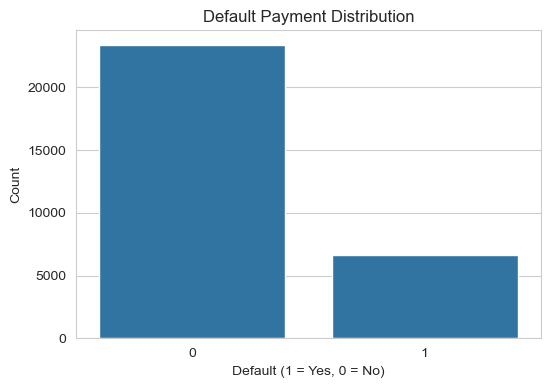

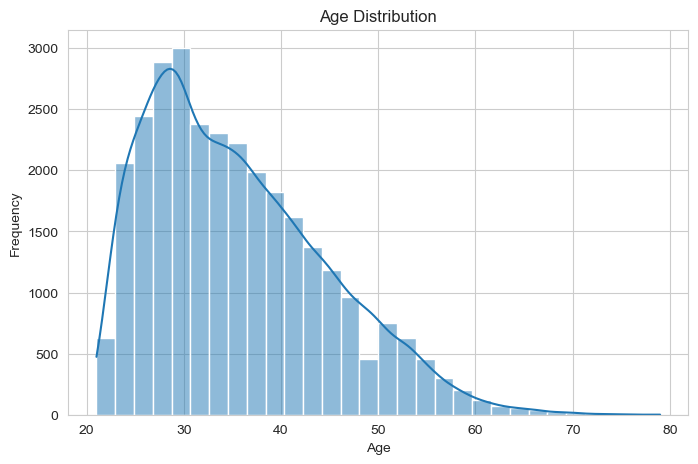

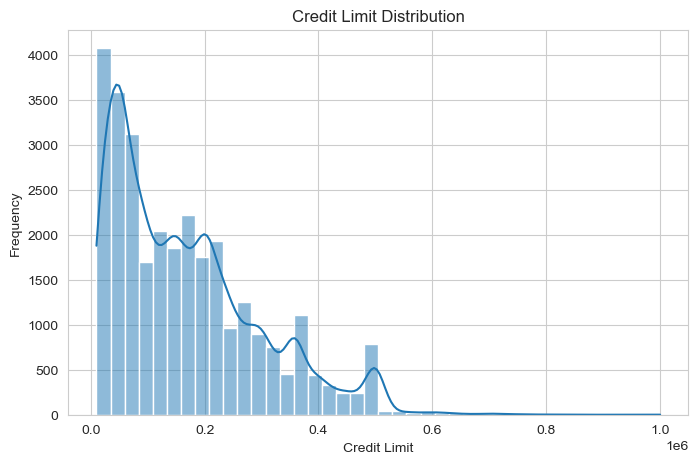

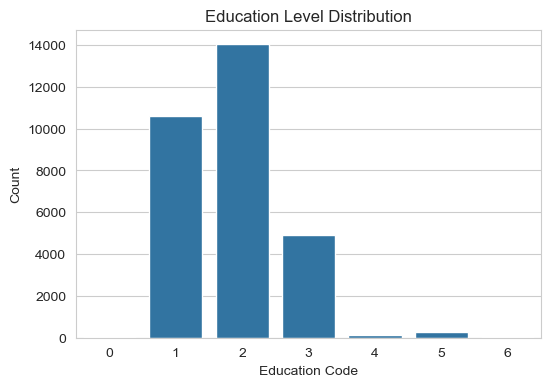

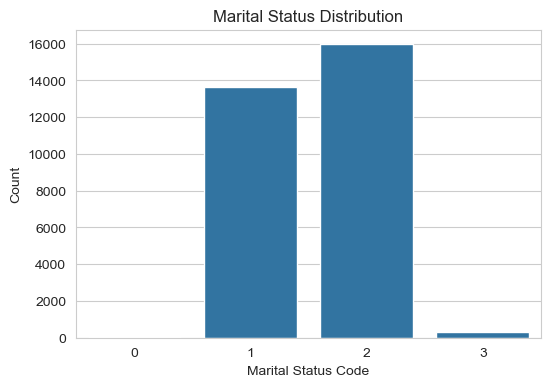

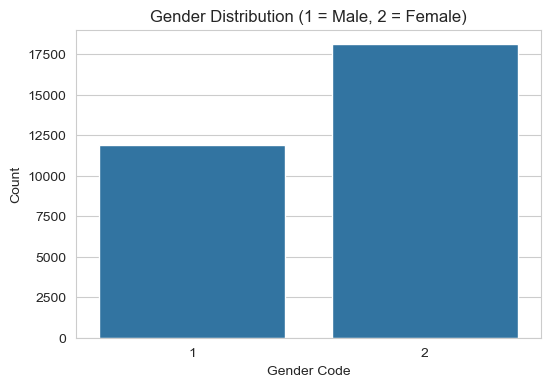

In [6]:
# Target Variable Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='default payment next month', data=df)
plt.title('Default Payment Distribution')
plt.xlabel('Default (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

print("\n")

# Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['AGE'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

print("\n")

# Credit Limit Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['LIMIT_BAL'], bins=40, kde=True)
plt.title('Credit Limit Distribution')
plt.xlabel('Credit Limit')
plt.ylabel('Frequency')
plt.show()

print("\n")

# Education Level
plt.figure(figsize=(6, 4))
sns.countplot(x='EDUCATION', data=df)
plt.title('Education Level Distribution')
plt.xlabel('Education Code')
plt.ylabel('Count')
plt.show()

print("\n")

# Marital Status
plt.figure(figsize=(6, 4))
sns.countplot(x='MARRIAGE', data=df)
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status Code')
plt.ylabel('Count')
plt.show()

print("\n")

# Gender Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='SEX', data=df)
plt.title('Gender Distribution (1 = Male, 2 = Female)')
plt.xlabel('Gender Code')
plt.ylabel('Count')
plt.show()

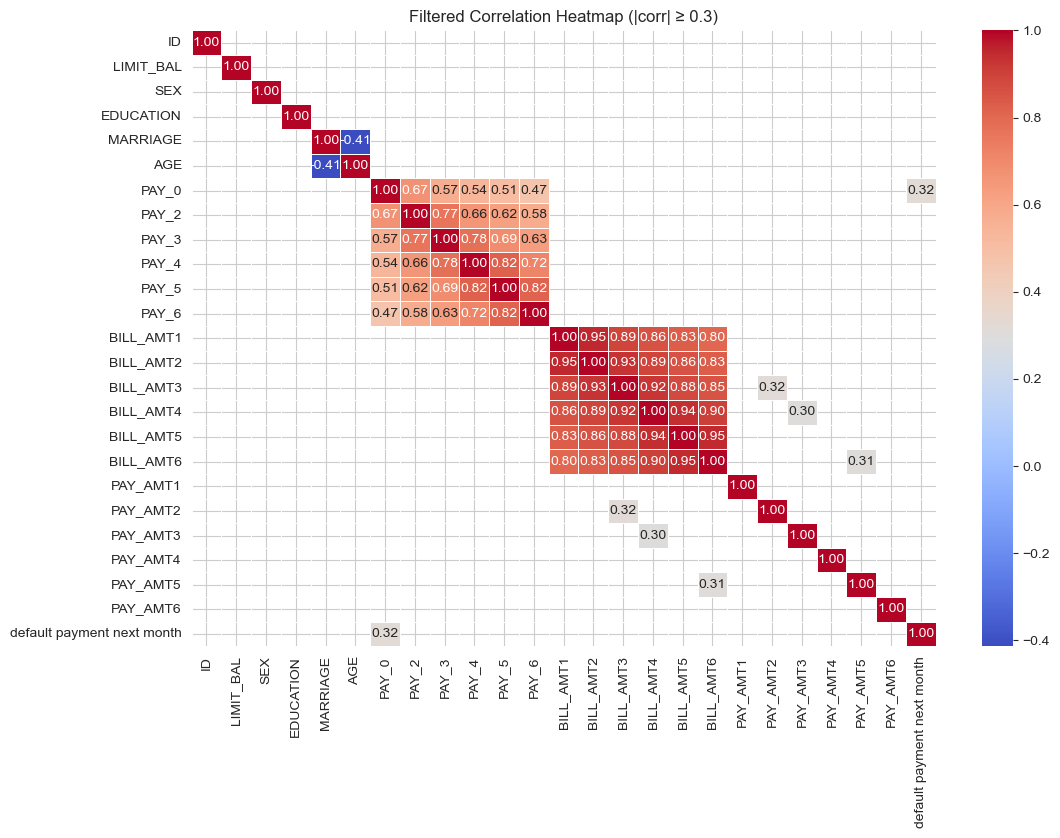

In [7]:
# Step 1: Compute correlation matrix
corr_matrix = df.corr()

# Step 2: Filter to keep only strong correlations (|corr| >= 0.3)
strong_corr = corr_matrix[(corr_matrix >= 0.3) | (corr_matrix <= -0.3)]

# Step 3: Drop rows/columns where all values are NaN (i.e., no strong correlation)
filtered_corr = strong_corr.dropna(axis=0, how='all').dropna(axis=1, how='all')

# Step 4: Plot the filtered heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Filtered Correlation Heatmap (|corr| ≥ 0.3)")
plt.show()

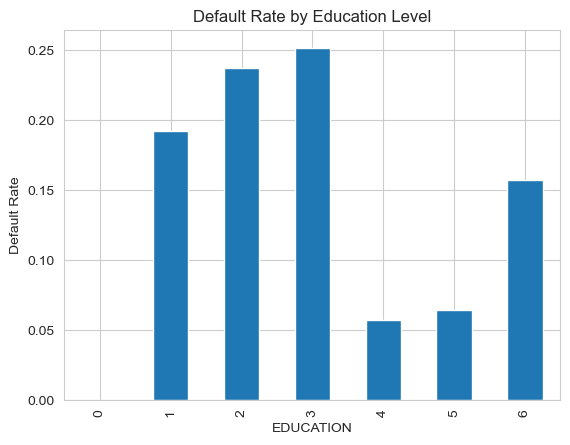

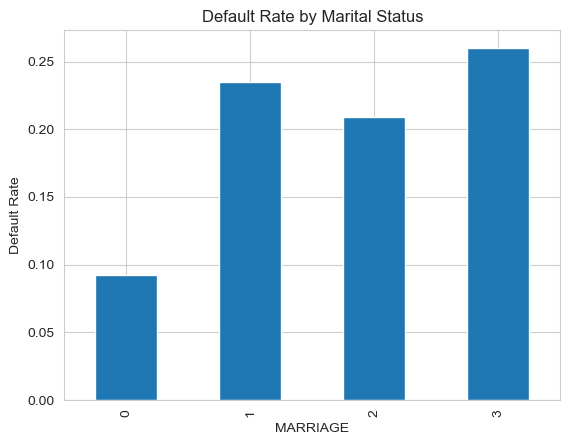

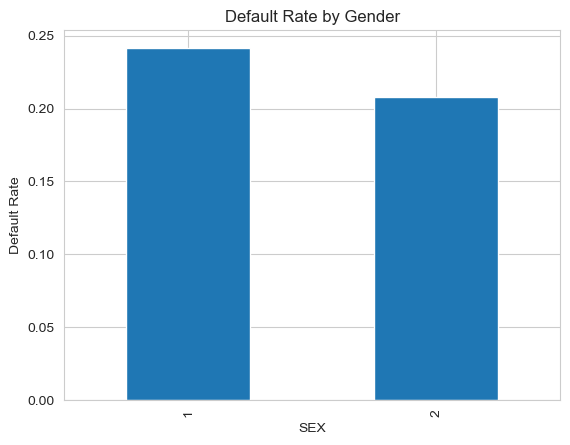

In [8]:
# Default rate by education
edu_default = df.groupby("EDUCATION")["default payment next month"].mean()
edu_default.plot(kind="bar", title="Default Rate by Education Level", ylabel="Default Rate")
plt.show()

print("\n")

# Default rate by marital status
marriage_default = df.groupby("MARRIAGE")["default payment next month"].mean()
marriage_default.plot(kind="bar", title="Default Rate by Marital Status", ylabel="Default Rate")
plt.show()

print("\n")

# Default rate by gender
gender_default = df.groupby("SEX")["default payment next month"].mean()
gender_default.plot(kind="bar", title="Default Rate by Gender", ylabel="Default Rate")
plt.show()

In [9]:
df["EDUCATION"].unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [10]:
df['EDUCATION'] = df['EDUCATION'].replace({0: 4, 5: 4, 6: 4})

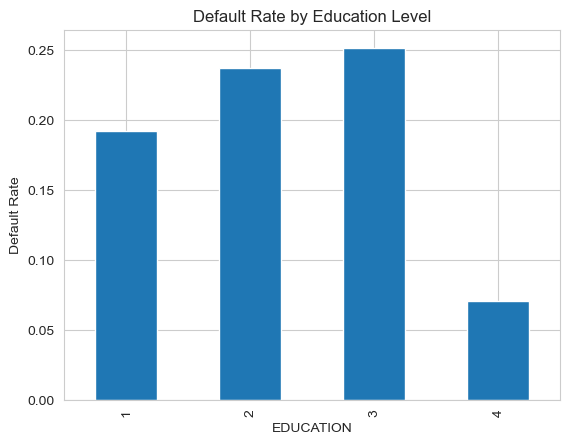

In [11]:
# Default rate by education
edu_default = df.groupby("EDUCATION")["default payment next month"].mean()
edu_default.plot(kind="bar", title="Default Rate by Education Level", ylabel="Default Rate")
plt.show()

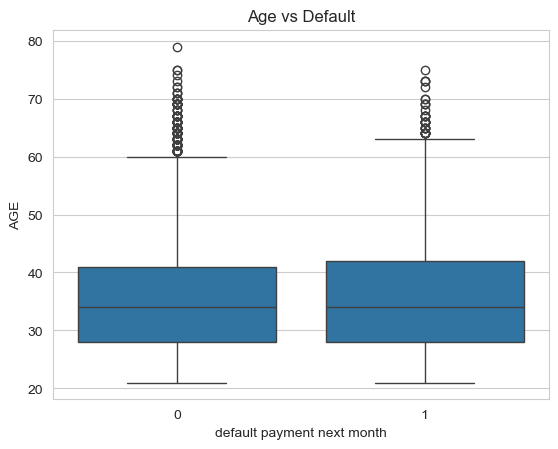

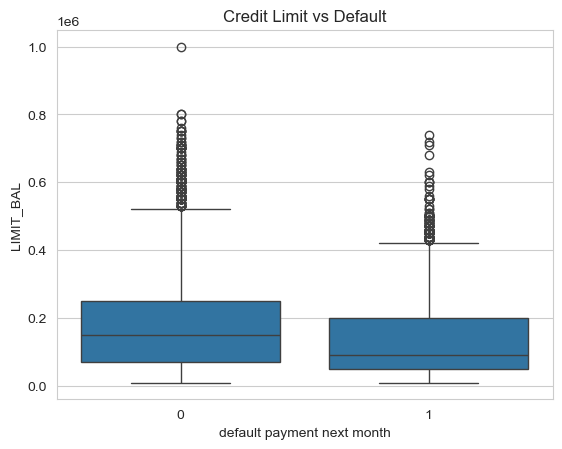

In [12]:
# Boxplot: Age vs Default
sns.boxplot(x="default payment next month", y="AGE", data=df)
plt.title("Age vs Default")
plt.show()

print("\n")

# Boxplot: Credit Limit vs Default
sns.boxplot(x="default payment next month", y="LIMIT_BAL", data=df)
plt.title("Credit Limit vs Default")
plt.show()

In [13]:
# Drop 'ID' column since it's just an identifier, not useful for prediction
df.drop(columns=['ID'], inplace=True)

# Optional: Confirm columns remaining
print("Remaining columns:")
print(df.columns.tolist())

Remaining columns:
['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment next month']


In [14]:
# Step 1: Separate features and target
X = df.drop(columns=['default payment next month'])
y = df['default payment next month']

# Step 2: Initialize and apply scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Convert back to DataFrame (optional, but useful for inspection)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [15]:
# Display the first few rows of the dataset to inspect its structure
X_scaled_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,-1.136720,0.810161,0.21187,-1.057295,-1.246020,1.794564,1.782348,-0.696663,-0.666599,-1.530046,...,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382
1,-0.365981,0.810161,0.21187,0.858557,-1.029047,-0.874991,1.782348,0.138865,0.188746,0.234917,...,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878
2,-0.597202,0.810161,0.21187,0.858557,-0.161156,0.014861,0.111736,0.138865,0.188746,0.234917,...,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122
3,-0.905498,0.810161,0.21187,-1.057295,0.164303,0.014861,0.111736,0.138865,0.188746,0.234917,...,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130
4,-0.905498,-1.234323,0.21187,-1.057295,2.334029,-0.874991,0.111736,-0.696663,0.188746,0.234917,...,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187


In [16]:
# Split the scaled features and labels
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled_df,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Preserves class distribution
)

# Confirm shape
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (24000, 23)
Test shape: (6000, 23)


Confusion Matrix:
[[3256 1417]
 [ 504  823]]

Classification Report:
              precision    recall  f1-score   support

           0     0.8660    0.6968    0.7722      4673
           1     0.3674    0.6202    0.4615      1327

    accuracy                         0.6798      6000
   macro avg     0.6167    0.6585    0.6168      6000
weighted avg     0.7557    0.6798    0.7035      6000

ROC-AUC Score: 0.7080304353876935


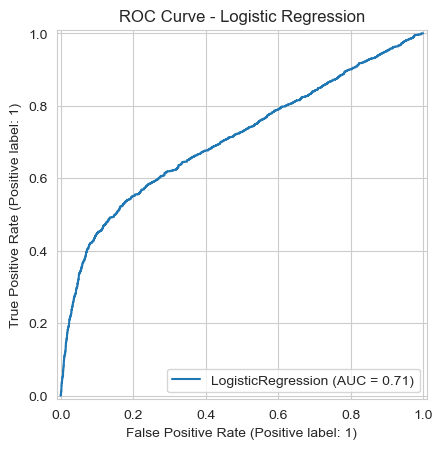

In [17]:
# Initialize model with class_weight='balanced' to handle class imbalance
logreg = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)

# Fit the model
logreg.fit(X_train, y_train)

# Predict on test data
y_pred = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)[:, 1]  # for ROC-AUC

# Evaluation metrics
print("Confusion Matrix:")
# Compute the confusion matrix to evaluate classification performance
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
# Generate a classification report with precision, recall, and F1-score
print(classification_report(y_test, y_pred, digits=4))

# Calculate the ROC-AUC score to evaluate model discrimination
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

# Optional: Plot ROC Curve
# Plot the ROC curve to visualize the tradeoff between TPR and FPR
RocCurveDisplay.from_estimator(logreg, X_test, y_test)
# Plot using matplotlib
plt.title("ROC Curve - Logistic Regression")
# Plot using matplotlib
plt.show()

In [18]:
# Define parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],  # use 'l1' if using solver='liblinear' or 'saga'
    'solver': ['liblinear', 'lbfgs']
}

# Initialize model with class weight
logreg = LogisticRegression(class_weight='balanced', max_iter=1000)

# Grid search
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Print results
print("Best Parameters:", grid_search.best_params_)
print("\nConfusion Matrix:")
# Compute the confusion matrix to evaluate classification performance
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
# Generate a classification report with precision, recall, and F1-score
print(classification_report(y_test, y_pred, digits=4))
# Calculate the ROC-AUC score to evaluate model discrimination
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}

Confusion Matrix:
[[3253 1420]
 [ 505  822]]

Classification Report:
              precision    recall  f1-score   support

           0     0.8656    0.6961    0.7717      4673
           1     0.3666    0.6194    0.4606      1327

    accuracy                         0.6792      6000
   macro avg     0.6161    0.6578    0.6162      6000
weighted avg     0.7553    0.6792    0.7029      6000

ROC-AUC Score: 0.7079498041547985


Confusion Matrix:
[[4420  253]
 [ 877  450]]



Classification Report:
              precision    recall  f1-score   support

           0     0.8344    0.9459    0.8867      4673
           1     0.6401    0.3391    0.4433      1327

    accuracy                         0.8117      6000
   macro avg     0.7373    0.6425    0.6650      6000
weighted avg     0.7915    0.8117    0.7886      6000



ROC-AUC Score: 0.7514665611795123




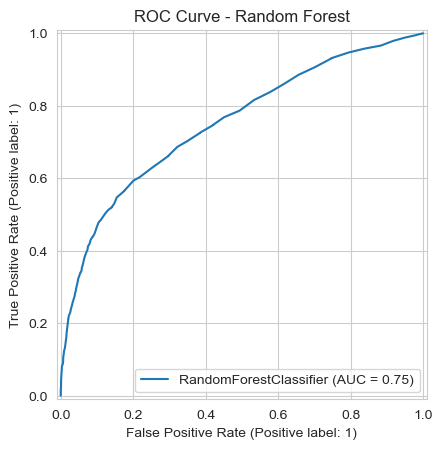

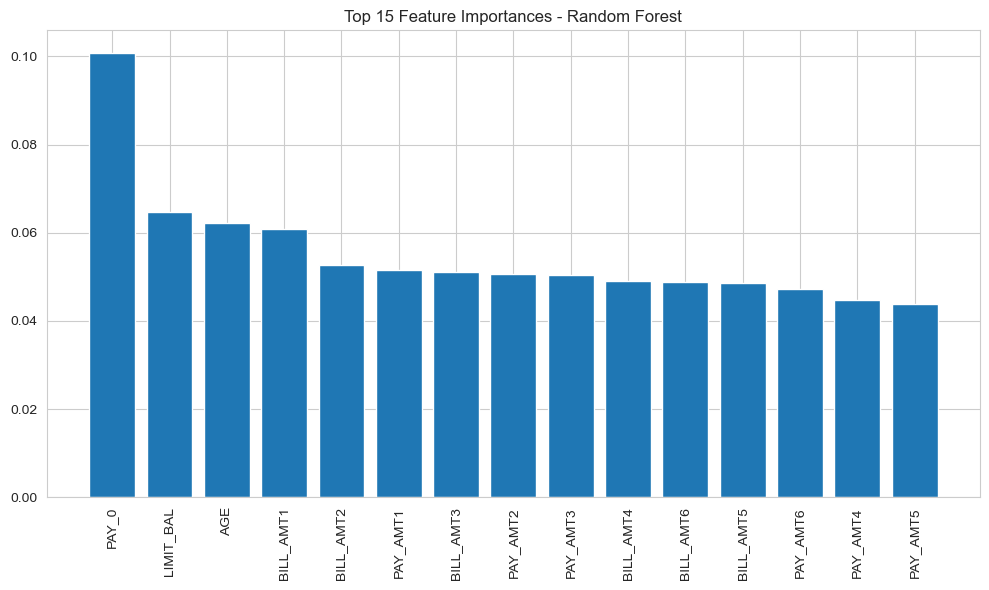

In [21]:
# Initialize the model
# Train a Random Forest classifier on the training data
rf_model = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

# Train the model
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluation
print("Confusion Matrix:")
# Compute the confusion matrix to evaluate classification performance
print(confusion_matrix(y_test, y_pred_rf))

print("\n")

print("\nClassification Report:")
# Generate a classification report with precision, recall, and F1-score
print(classification_report(y_test, y_pred_rf, digits=4))

print("\n")

# Calculate the ROC-AUC score to evaluate model discrimination
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_rf))

print("\n")

# ROC Curve
# Plot the ROC curve to visualize the tradeoff between TPR and FPR
RocCurveDisplay.from_estimator(rf_model, X_test, y_test)
# Plot using matplotlib
plt.title("ROC Curve - Random Forest")
# Plot using matplotlib
plt.show()

print("\n")

# Feature Importance Plot
# Display or plot the importance scores of features used by the model
importances = rf_model.feature_importances_
features = X_train.columns
indices = importances.argsort()[::-1]

# Plot using matplotlib
plt.figure(figsize=(10, 6))
# Plot using matplotlib
plt.title("Top 15 Feature Importances - Random Forest")
# Plot using matplotlib
plt.bar(range(15), importances[indices[:15]], align='center')
# Plot using matplotlib
plt.xticks(range(15), features[indices[:15]], rotation=90)
# Plot using matplotlib
plt.tight_layout()
# Plot using matplotlib
plt.show()

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 71}



Confusion Matrix:
[[3980  693]
 [ 582  745]]



Classification Report:
              precision    recall  f1-score   support

           0     0.8724    0.8517    0.8619      4673
           1     0.5181    0.5614    0.5389      1327

    accuracy                         0.7875      6000
   macro avg     0.6953    0.7066    0.7004      6000
weighted avg     0.7941    0.7875    0.7905      6000



ROC-AUC Score: 0.7734075291187603


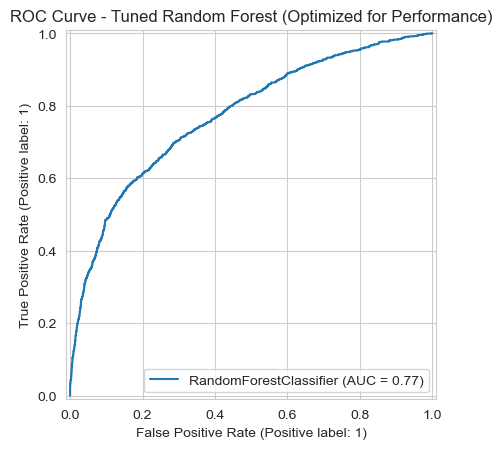

In [27]:
# Define parameter grid
# Reduced parameter space for better performance
param_dist = {
    'n_estimators': randint(50, 150),               
    'max_depth': [10, 20, None],                    
    'min_samples_split': [2, 5],                    
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', None]                  
}

# Base model with balanced class weight
# Train a Random Forest classifier on the training data
rf = RandomForestClassifier(
    class_weight='balanced',
    random_state=42,
    n_jobs=1                                       
)

# RandomizedSearch with fewer iterations and folds
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,                                      
    scoring='roc_auc',
    cv=3,                                         
    verbose=1,
    n_jobs=1,                                    
    random_state=42
)

# Fit the model
rf_random.fit(X_train, y_train)

# Best model
best_rf = rf_random.best_estimator_

# Predictions
y_pred_best = best_rf.predict(X_test)
y_proba_best = best_rf.predict_proba(X_test)[:, 1]

# Evaluation
print("Best Parameters:", rf_random.best_params_)

print("\n")

print("\nConfusion Matrix:")
# Compute the confusion matrix to evaluate classification performance
print(confusion_matrix(y_test, y_pred_best))

print("\n")

print("\nClassification Report:")
# Generate a classification report with precision, recall, and F1-score
print(classification_report(y_test, y_pred_best, digits=4))

print("\n")

# Calculate the ROC-AUC score to evaluate model discrimination
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_best))

# ROC Curve
# Plot the ROC curve to visualize the tradeoff between TPR and FPR
RocCurveDisplay.from_estimator(best_rf, X_test, y_test)
# Plot using matplotlib
plt.title("ROC Curve - Tuned Random Forest (Optimized for Performance)")
# Plot using matplotlib
plt.show()

Confusion Matrix:
[[3784  889]
 [ 559  768]]



Classification Report:
              precision    recall  f1-score   support

           0     0.8713    0.8098    0.8394      4673
           1     0.4635    0.5787    0.5147      1327

    accuracy                         0.7587      6000
   macro avg     0.6674    0.6943    0.6771      6000
weighted avg     0.7811    0.7587    0.7676      6000



ROC-AUC Score: 0.7581283942725378




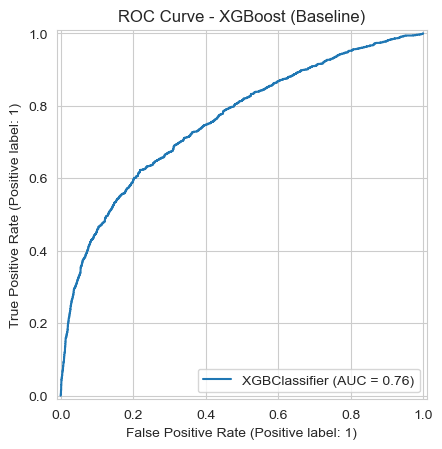

In [35]:
# Compute scale_pos_weight for imbalance
neg, pos = (y_train == 0).sum(), (y_train == 1).sum()
scale = neg / pos

# Initialize XGBoost model
# Train an XGBoost classifier on the training data
xgb_model = XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=scale,
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)

# Fit the model
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluation
print("Confusion Matrix:")
# Compute the confusion matrix to evaluate classification performance
print(confusion_matrix(y_test, y_pred_xgb))

print("\n")

print("\nClassification Report:")
# Generate a classification report with precision, recall, and F1-score
print(classification_report(y_test, y_pred_xgb, digits=4))

print("\n")

# Calculate the ROC-AUC score to evaluate model discrimination
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_xgb))

print("\n")

# ROC Curve
# Plot the ROC curve to visualize the tradeoff between TPR and FPR
RocCurveDisplay.from_estimator(xgb_model, X_test, y_test)
# Plot using matplotlib
plt.title("ROC Curve - XGBoost (Baseline)")
# Plot using matplotlib
plt.show()

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.07084844859190755, 'max_depth': 5, 'n_estimators': 138, 'subsample': 0.8}

Confusion Matrix:
[[3789  884]
 [ 507  820]]

Classification Report:
              precision    recall  f1-score   support

           0     0.8820    0.8108    0.8449      4673
           1     0.4812    0.6179    0.5411      1327

    accuracy                         0.7682      6000
   macro avg     0.6816    0.7144    0.6930      6000
weighted avg     0.7933    0.7682    0.7777      6000

ROC-AUC Score: 0.7785014072569078


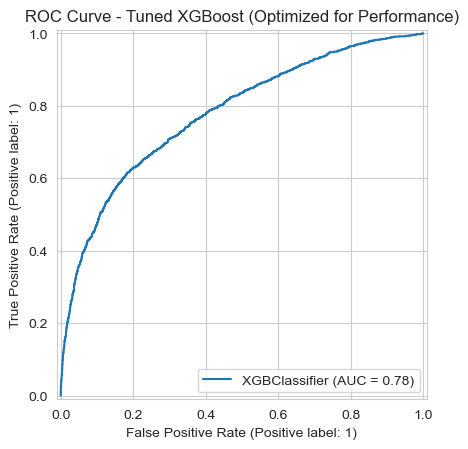

In [37]:
# Compute scale_pos_weight again
neg, pos = (y_train == 0).sum(), (y_train == 1).sum()
scale = neg / pos

# Define parameter space (simplified)
param_dist = {
    'n_estimators': randint(50, 150),
    'max_depth': [3, 5, 7],
    'learning_rate': uniform(0.01, 0.2),
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.25, 0.5]
}

# Initialize model
# Train an XGBoost classifier on the training data
xgb = XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=scale,
    eval_metric='logloss',
    random_state=42,
    n_jobs=1
)

# RandomizedSearchCV
xgb_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=10,             
    scoring='roc_auc',
    cv=3,                   
    verbose=1,
    random_state=42,
    n_jobs=1               
)

# Fit the model
xgb_search.fit(X_train, y_train)

# Evaluate best model
best_xgb = xgb_search.best_estimator_
y_pred_best = best_xgb.predict(X_test)
y_proba_best = best_xgb.predict_proba(X_test)[:, 1]

# Results
print("Best Parameters:", xgb_search.best_params_)
print("\nConfusion Matrix:")
# Compute the confusion matrix to evaluate classification performance
print(confusion_matrix(y_test, y_pred_best))
print("\nClassification Report:")
# Generate a classification report with precision, recall, and F1-score
print(classification_report(y_test, y_pred_best, digits=4))
# Calculate the ROC-AUC score to evaluate model discrimination
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_best))

# Plot ROC Curve
# Plot the ROC curve to visualize the tradeoff between TPR and FPR
RocCurveDisplay.from_estimator(best_xgb, X_test, y_test)
# Plot using matplotlib
plt.title("ROC Curve - Tuned XGBoost (Optimized for Performance)")
# Plot using matplotlib
plt.show()

In [107]:
# Save the trained Random Forest model
joblib.dump(rf_model, 'random_forest_credit_model.pkl')

print("Model saved as 'random_forest_credit_model.pkl'")

Model saved as 'random_forest_credit_model.pkl'


Confusion Matrix:
[[4420  253]
 [ 877  450]]

Classification Report:
              precision    recall  f1-score   support

           0     0.8344    0.9459    0.8867      4673
           1     0.6401    0.3391    0.4433      1327

    accuracy                         0.8117      6000
   macro avg     0.7373    0.6425    0.6650      6000
weighted avg     0.7915    0.8117    0.7886      6000


ROC-AUC Score: 0.7514665611795123


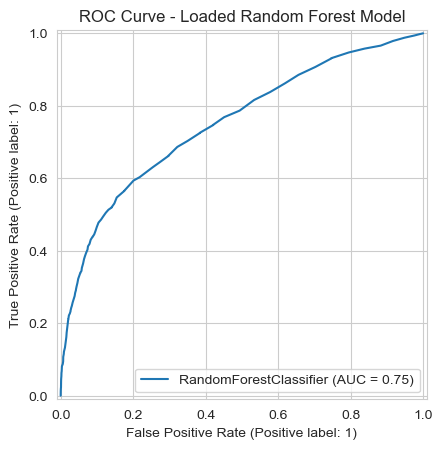

In [109]:
# Load the saved model
loaded_model = joblib.load('random_forest_credit_model.pkl')

# Predict on the test set
y_pred_loaded = loaded_model.predict(X_test)
y_proba_loaded = loaded_model.predict_proba(X_test)[:, 1]

# Evaluation metrics
print("Confusion Matrix:")
# Compute the confusion matrix to evaluate classification performance
print(confusion_matrix(y_test, y_pred_loaded))

print("\nClassification Report:")
# Generate a classification report with precision, recall, and F1-score
print(classification_report(y_test, y_pred_loaded, digits=4))

# Calculate the ROC-AUC score to evaluate model discrimination
print("\nROC-AUC Score:", roc_auc_score(y_test, y_proba_loaded))

# ROC Curve
# Plot the ROC curve to visualize the tradeoff between TPR and FPR
RocCurveDisplay.from_estimator(loaded_model, X_test, y_test)
# Plot using matplotlib
plt.title("ROC Curve - Loaded Random Forest Model")
# Plot using matplotlib
plt.show()

In [48]:
# L1 Logistic Regression (Lasso)
logreg_l1 = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
logreg_l1.fit(X_train, y_train)

# Get L1-based feature importances
l1_coeffs = pd.Series(np.abs(logreg_l1.coef_[0]), index=X_train.columns)
top_features = l1_coeffs[l1_coeffs > 0].sort_values(ascending=False) # top N

# Display selected features
print("Top features selected by L1 regularization:")
print(top_features)

# Reduce train/test sets to only top features
X_train_reduced = X_train[top_features.index]
X_test_reduced = X_test[top_features.index]

Top features selected by L1 regularization:
PAY_0        0.661338
BILL_AMT1    0.304049
PAY_AMT2     0.202326
PAY_AMT1     0.200684
LIMIT_BAL    0.132936
PAY_3        0.097301
PAY_2        0.092826
EDUCATION    0.090852
BILL_AMT2    0.084499
AGE          0.073633
MARRIAGE     0.072105
PAY_4        0.061789
SEX          0.055899
BILL_AMT4    0.049789
PAY_AMT4     0.038824
PAY_AMT3     0.034297
BILL_AMT3    0.032577
PAY_AMT6     0.028839
BILL_AMT5    0.024785
PAY_AMT5     0.023584
PAY_6        0.016517
dtype: float64


In [70]:
# Initialize a dictionary to store p-values
p_values = {}

# Loop through all features and compute independent t-test
for column in X.columns:
    group0 = X[y == 0][column]
    group1 = X[y == 1][column]
    t_stat, p_val = ttest_ind(group0, group1, equal_var=False, nan_policy='omit')
    p_values[column] = p_val

# Convert results to DataFrame
pval_df = pd.DataFrame(list(p_values.items()), columns=["Feature", "P-Value"])
pval_df = pval_df.sort_values(by="P-Value", ascending=True).reset_index(drop=True)

pval_series = pd.Series(p_values)
# Display all p-values
print(pval_df)

      Feature        P-Value
0       PAY_0   0.000000e+00
1       PAY_2  7.502500e-302
2       PAY_3  8.393103e-245
3       PAY_4  3.887361e-200
4   LIMIT_BAL  3.364100e-178
5       PAY_5  5.643134e-175
6       PAY_6  7.355579e-151
7    PAY_AMT1   3.545865e-68
8    PAY_AMT2   1.881974e-49
9    PAY_AMT4   3.374781e-34
10   PAY_AMT3   1.780616e-32
11   PAY_AMT5   3.235772e-29
12   PAY_AMT6   2.591373e-28
13        SEX   7.349023e-12
14  EDUCATION   2.827699e-07
15   MARRIAGE   2.738957e-05
16  BILL_AMT1   6.818918e-04
17  BILL_AMT3   1.394545e-02
18  BILL_AMT2   1.443729e-02
19        AGE   2.038649e-02
20  BILL_AMT4   7.864210e-02
21  BILL_AMT5   2.451289e-01
22  BILL_AMT6   3.522833e-01


In [76]:
# Step 4: Combine L1 coefficients and p-values (only for features with L1 weight > 0)
common_features = l1_coeffs.index.intersection(pval_series.index)
df_combined = pd.DataFrame({
    "L1_Weight": l1_coeffs[common_features],
    "P_Value": pval_series[common_features]
})

# Step 5: Compute significance and normalized metrics
df_combined["Significance"] = -np.log10(df_combined["P_Value"].replace(0, 1e-308))
df_combined["Norm_L1"] = df_combined["L1_Weight"] / df_combined["L1_Weight"].max()
df_combined["Norm_Sig"] = df_combined["Significance"] / df_combined["Significance"].max()
df_combined["Score"] = (df_combined["Norm_L1"] + df_combined["Norm_Sig"]) / 2

# Step 6: Sort by combined score
df_ranked = df_combined.sort_values(by="Score", ascending=False)

# View the final ranked feature table
df_ranked.head(10)

,L1_Weight,P_Value,Significance,Norm_L1,Norm_Sig,Score
PAY_0,0.661338,0.000000e+00,308.000000,1.000000,1.000000,1.000000
PAY_2,0.092826,7.502500e-302,301.124794,0.140361,0.977678,0.559020
PAY_3,0.097301,8.393103e-245,244.076077,0.147128,0.792455,0.469791
LIMIT_BAL,0.132936,3.364100e-178,177.473131,0.201011,0.576211,0.388611
PAY_4,0.061789,3.887361e-200,199.410345,0.093431,0.647436,0.370433
PAY_5,0.000000,5.643134e-175,174.248480,0.000000,0.565742,0.282871
PAY_AMT1,0.200684,3.545865e-68,67.450278,0.303452,0.218994,0.261223
PAY_6,0.016517,7.355579e-151,150.133383,0.024975,0.487446,0.256211
BILL_AMT1,0.304049,6.818918e-04,3.166285,0.459749,0.010280,0.235014
PAY_AMT2,0.202326,1.881974e-49,48.725386,0.305935,0.158199,0.232067


Confusion Matrix:
[[3209 1464]
 [ 490  837]]

Classification Report:
              precision    recall  f1-score   support

           0     0.8675    0.6867    0.7666      4673
           1     0.3638    0.6307    0.4614      1327

    accuracy                         0.6743      6000
   macro avg     0.6156    0.6587    0.6140      6000
weighted avg     0.7561    0.6743    0.6991      6000

ROC-AUC Score: 0.7033453576003242


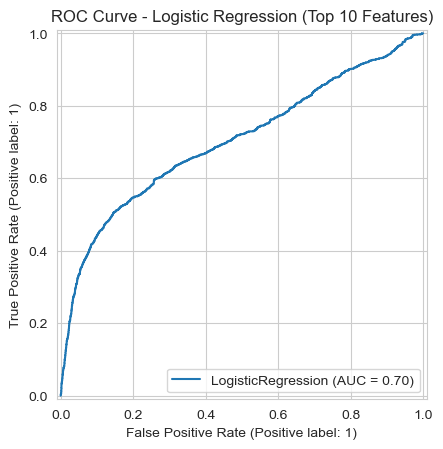

In [78]:
# Step 1: Select top 10 features (based on your combined score ranking)
top_10_features = df_ranked.head(10).index.tolist()

# Step 2: Subset training and testing data
X_train_top10 = X_train[top_10_features]
X_test_top10 = X_test[top_10_features]

# Step 3: Initialize the Logistic Regression model
logreg = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)

# Step 4: Fit the model
logreg.fit(X_train_top10, y_train)

# Step 5: Make predictions
y_pred = logreg.predict(X_test_top10)
y_proba = logreg.predict_proba(X_test_top10)[:, 1]

# Step 6: Evaluate the model
print("Confusion Matrix:")
# Compute the confusion matrix to evaluate classification performance
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
# Generate a classification report with precision, recall, and F1-score
print(classification_report(y_test, y_pred, digits=4))

# Calculate the ROC-AUC score to evaluate model discrimination
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))

# Step 7: Plot ROC Curve
# Plot the ROC curve to visualize the tradeoff between TPR and FPR
RocCurveDisplay.from_estimator(logreg, X_test_top10, y_test)
# Plot using matplotlib
plt.title("ROC Curve - Logistic Regression (Top 10 Features)")
# Plot using matplotlib
plt.show()

Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}

Confusion Matrix:
[[3209 1464]
 [ 490  837]]

Classification Report:
              precision    recall  f1-score   support

           0     0.8675    0.6867    0.7666      4673
           1     0.3638    0.6307    0.4614      1327

    accuracy                         0.6743      6000
   macro avg     0.6156    0.6587    0.6140      6000
weighted avg     0.7561    0.6743    0.6991      6000

ROC-AUC Score: 0.7033453576003242


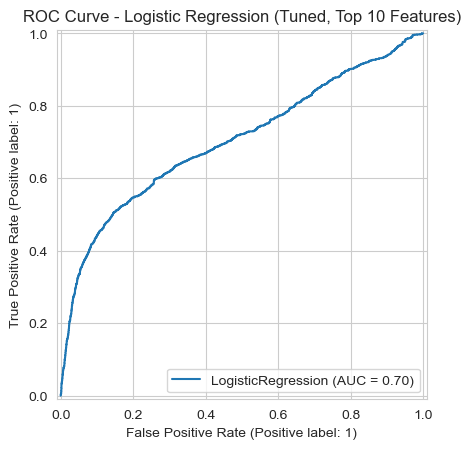

In [92]:
# Step 2: Define parameter grid for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],  # use 'l1' only with 'liblinear' or 'saga'
    'solver': ['liblinear', 'lbfgs']
}

# Step 3: Initialize model
logreg = LogisticRegression(class_weight='balanced', max_iter=1000)

# Perform hyperparameter tuning using GridSearchCV
# Step 4: Run GridSearchCV
# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_top10, y_train)

# Step 5: Evaluate best model
logreg_best_model = grid_search.best_estimator_
y_pred_best_logreg = logreg_best_model.predict(X_test_top10)
y_proba_best_logreg = logreg_best_model.predict_proba(X_test_top10)[:, 1]

# Step 6: Display results
print("Best Parameters:", grid_search.best_params_)
print("\nConfusion Matrix:")
# Compute the confusion matrix to evaluate classification performance
print(confusion_matrix(y_test, y_pred_best_logreg))
print("\nClassification Report:")
# Generate a classification report with precision, recall, and F1-score
print(classification_report(y_test, y_pred_best_logreg, digits=4))
# Calculate the ROC-AUC score to evaluate model discrimination
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_best_logreg))

# Step 7: ROC Curve
# Plot the ROC curve to visualize the tradeoff between TPR and FPR
RocCurveDisplay.from_estimator(logreg_best_model, X_test_top10, y_test)
# Plot using matplotlib
plt.title("ROC Curve - Logistic Regression (Tuned, Top 10 Features)")
# Plot using matplotlib
plt.show()

Confusion Matrix:
[[4280  393]
 [ 810  517]]

Classification Report:
              precision    recall  f1-score   support

           0     0.8409    0.9159    0.8768      4673
           1     0.5681    0.3896    0.4622      1327

    accuracy                         0.7995      6000
   macro avg     0.7045    0.6528    0.6695      6000
weighted avg     0.7805    0.7995    0.7851      6000

ROC-AUC Score: 0.7352434764897868


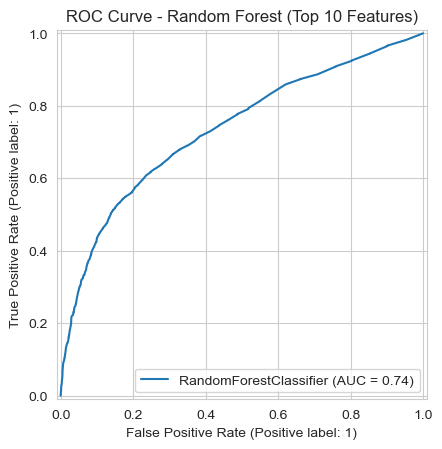

In [84]:
X_train_top10 = X_train[top_10_features]
X_test_top10 = X_test[top_10_features]

# Step 3: Initialize Random Forest model
# Train a Random Forest classifier on the training data
rf_model = RandomForestClassifier(
    n_estimators=100,
    class_weight='balanced',
    random_state=42,
    n_jobs=-1
)

# Step 4: Train the model
rf_model.fit(X_train_top10, y_train)

# Step 5: Predict
y_pred_rf = rf_model.predict(X_test_top10)
y_proba_rf = rf_model.predict_proba(X_test_top10)[:, 1]

# Step 6: Evaluate
print("Confusion Matrix:")
# Compute the confusion matrix to evaluate classification performance
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
# Generate a classification report with precision, recall, and F1-score
print(classification_report(y_test, y_pred_rf, digits=4))
# Calculate the ROC-AUC score to evaluate model discrimination
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_rf))

# Step 7: ROC Curve
# Plot the ROC curve to visualize the tradeoff between TPR and FPR
RocCurveDisplay.from_estimator(rf_model, X_test_top10, y_test)
# Plot using matplotlib
plt.title("ROC Curve - Random Forest (Top 10 Features)")
# Plot using matplotlib
plt.show()

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 132}

Confusion Matrix:
[[3953  720]
 [ 573  754]]

Classification Report:
              precision    recall  f1-score   support

           0     0.8734    0.8459    0.8594      4673
           1     0.5115    0.5682    0.5384      1327

    accuracy                         0.7845      6000
   macro avg     0.6925    0.7071    0.6989      6000
weighted avg     0.7934    0.7845    0.7884      6000

ROC-AUC Score: 0.7703939367893062


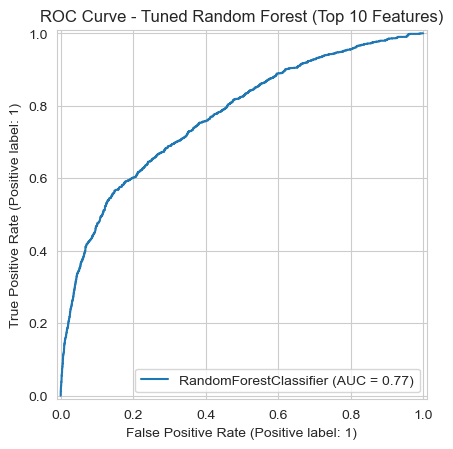

In [94]:
# Define parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(50, 150),
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', None]
}

# Base model
# Train a Random Forest classifier on the training data
rf = RandomForestClassifier(
    class_weight='balanced',
    random_state=42,
    n_jobs=1
)

# RandomizedSearchCV
rf_random = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=10,
    scoring='roc_auc',
    cv=3,
    verbose=1,
    n_jobs=1,
    random_state=42
)

# Fit the randomized search model
rf_random.fit(X_train_top10, y_train)

# Best model and evaluation
best_rf = rf_random.best_estimator_
y_pred_best_rf = best_rf.predict(X_test_top10)
y_proba_best_rf = best_rf.predict_proba(X_test_top10)[:, 1]

# Evaluation
print("Best Parameters:", rf_random.best_params_)
print("\nConfusion Matrix:")
# Compute the confusion matrix to evaluate classification performance
print(confusion_matrix(y_test, y_pred_best_rf))
print("\nClassification Report:")
# Generate a classification report with precision, recall, and F1-score
print(classification_report(y_test, y_pred_best_rf, digits=4))
# Calculate the ROC-AUC score to evaluate model discrimination
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_best_rf))

# ROC Curve
# Plot the ROC curve to visualize the tradeoff between TPR and FPR
RocCurveDisplay.from_estimator(best_rf, X_test_top10, y_test)
# Plot using matplotlib
plt.title("ROC Curve - Tuned Random Forest (Top 10 Features)")
# Plot using matplotlib
plt.show()

Confusion Matrix:
[[3682  991]
 [ 542  785]]

Classification Report:
              precision    recall  f1-score   support

           0     0.8717    0.7879    0.8277      4673
           1     0.4420    0.5916    0.5060      1327

    accuracy                         0.7445      6000
   macro avg     0.6568    0.6897    0.6668      6000
weighted avg     0.7767    0.7445    0.7565      6000

ROC-AUC Score: 0.7525004148476933


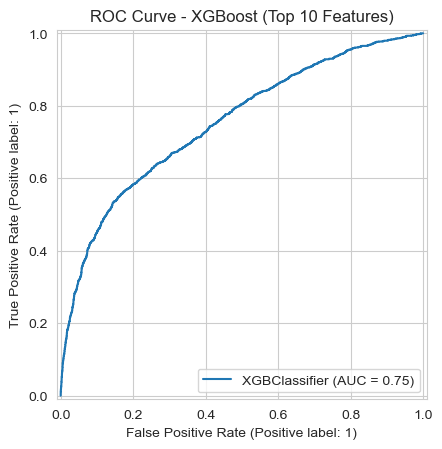

In [88]:
# Initialize XGBoost model
# Train an XGBoost classifier on the training data
xgb_model = XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=scale,
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)

# Train the model
xgb_model.fit(X_train_top10, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test_top10)
y_proba_xgb = xgb_model.predict_proba(X_test_top10)[:, 1]

# Evaluate
print("Confusion Matrix:")
# Compute the confusion matrix to evaluate classification performance
print(confusion_matrix(y_test, y_pred_xgb))

print("\nClassification Report:")
# Generate a classification report with precision, recall, and F1-score
print(classification_report(y_test, y_pred_xgb, digits=4))

# Calculate the ROC-AUC score to evaluate model discrimination
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_xgb))

# ROC Curve
# Plot the ROC curve to visualize the tradeoff between TPR and FPR
RocCurveDisplay.from_estimator(xgb_model, X_test_top10, y_test)
# Plot using matplotlib
plt.title("ROC Curve - XGBoost (Top 10 Features)")
# Plot using matplotlib
plt.show()

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1315089703802877, 'max_depth': 3, 'n_estimators': 122, 'subsample': 0.8}

Confusion Matrix:
[[3744  929]
 [ 511  816]]

Classification Report:
              precision    recall  f1-score   support

           0     0.8799    0.8012    0.8387      4673
           1     0.4676    0.6149    0.5312      1327

    accuracy                         0.7600      6000
   macro avg     0.6738    0.7081    0.6850      6000
weighted avg     0.7887    0.7600    0.7707      6000

ROC-AUC Score: 0.7744754091672228


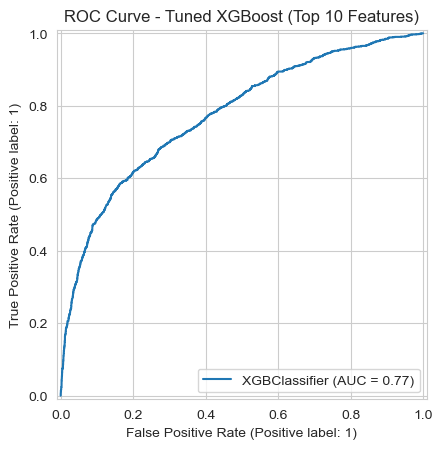

In [95]:
# Step 3: Define parameter grid for tuning
param_dist = {
    'n_estimators': randint(50, 150),
    'max_depth': [3, 5, 7],
    'learning_rate': uniform(0.01, 0.2),
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.25, 0.5]
}

# Step 4: Initialize XGBoost model
# Train an XGBoost classifier on the training data
xgb = XGBClassifier(
    objective='binary:logistic',
    scale_pos_weight=scale,
    eval_metric='logloss',
    random_state=42,
    n_jobs=1
)

# Step 5: Randomized Search
xgb_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=10,
    scoring='roc_auc',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=1
)

# Step 6: Fit and evaluate best model
xgb_search.fit(X_train_top10, y_train)
best_xgb = xgb_search.best_estimator_

y_pred_best_xgb = best_xgb.predict(X_test_top10)
y_proba_best_xgb = best_xgb.predict_proba(X_test_top10)[:, 1]

# Step 7: Results
print("Best Parameters:", xgb_search.best_params_)
print("\nConfusion Matrix:")
# Compute the confusion matrix to evaluate classification performance
print(confusion_matrix(y_test, y_pred_best_xgb))
print("\nClassification Report:")
# Generate a classification report with precision, recall, and F1-score
print(classification_report(y_test, y_pred_best_xgb, digits=4))
# Calculate the ROC-AUC score to evaluate model discrimination
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba_best_xgb))

# Step 8: ROC Curve
# Plot the ROC curve to visualize the tradeoff between TPR and FPR
RocCurveDisplay.from_estimator(best_xgb, X_test_top10, y_test)
# Plot using matplotlib
plt.title("ROC Curve - Tuned XGBoost (Top 10 Features)")
# Plot using matplotlib
plt.show()

In [104]:
# F1 scores from generic models
f1_logreg = f1_score(y_test, y_pred)
f1_rf = f1_score(y_test, y_pred_rf)
f1_xgb = f1_score(y_test, y_pred_xgb)

# Tuned models (make sure y_pred_best is updated after each tuning)
f1_logreg_tuned = f1_score(y_test, y_pred_best_logreg)
f1_rf_tuned = f1_score(y_test, y_pred_best_rf)
f1_xgb_tuned = f1_score(y_test, y_pred_best_xgb)

# Create DataFrame for comparison
f1_comparison_df = pd.DataFrame({
    "Model": [
        "Logistic Regression", "Random Forest", "XGBoost",
        "Tuned Logistic Regression", "Tuned Random Forest", "Tuned XGBoost"
    ],
    "F1 Score": [
        f1_logreg, f1_rf, f1_xgb,
        f1_logreg_tuned, f1_rf_tuned, f1_xgb_tuned
    ]
})

# Sort and view
f1_comparison_df = f1_comparison_df.sort_values(by="F1 Score", ascending=False).reset_index(drop=True)
f1_comparison_df

,Model,F1 Score
0,Tuned Random Forest,0.538379
1,Tuned XGBoost,0.531250
2,XGBoost,0.505962
3,Random Forest,0.462226
4,Logistic Regression,0.461411
5,Tuned Logistic Regression,0.461411


In [112]:
# Generic model predictions
acc_logreg = accuracy_score(y_test, y_pred)
acc_rf = accuracy_score(y_test, y_pred_rf)
acc_xgb = accuracy_score(y_test, y_pred_xgb)

# Tuned model predictions
acc_logreg_tuned = accuracy_score(y_test, y_pred_best_logreg)
acc_rf_tuned = accuracy_score(y_test, y_pred_best_rf)
acc_xgb_tuned = accuracy_score(y_test, y_pred_best_xgb)

# Create comparison DataFrame
accuracy_comparison_df = pd.DataFrame({
    "Model": [
        "Logistic Regression", "Random Forest", "XGBoost",
        "Tuned Logistic Regression", "Tuned Random Forest", "Tuned XGBoost"
    ],
    "Accuracy Score": [
        acc_logreg, acc_rf, acc_xgb,
        acc_logreg_tuned, acc_rf_tuned, acc_xgb_tuned
    ]
})

# Sort for readability
accuracy_comparison_df = accuracy_comparison_df.sort_values(by="Accuracy Score", ascending=False).reset_index(drop=True)

# Display result
accuracy_comparison_df

,Model,Accuracy Score
0,Random Forest,0.799500
1,Tuned Random Forest,0.784500
2,Tuned XGBoost,0.760000
3,XGBoost,0.744500
4,Logistic Regression,0.674333
5,Tuned Logistic Regression,0.674333


In [114]:
# Save paths for models
rf_path = "tuned_random_forest.pkl"
xgb_path = "tuned_xgboost.pkl"

# Save the tuned models (assumes these variables exist in memory)
# Replace with your actual model variables if needed
joblib.dump(best_rf, rf_path)
joblib.dump(best_xgb, xgb_path)

['tuned_xgboost.pkl']

In [116]:
# Step 1: Load models from disk
loaded_rf = joblib.load("tuned_random_forest.pkl")
loaded_xgb = joblib.load("tuned_xgboost.pkl")

# Step 2: Make predictions on the same test set
y_pred_rf_loaded = loaded_rf.predict(X_test_top10)
y_pred_xgb_loaded = loaded_xgb.predict(X_test_top10)

# Step 3: Evaluate
print("=== Random Forest ===")
print("Confusion Matrix:")
# Compute the confusion matrix to evaluate classification performance
print(confusion_matrix(y_test, y_pred_rf_loaded))
print("\nClassification Report:")
# Generate a classification report with precision, recall, and F1-score
print(classification_report(y_test, y_pred_rf_loaded, digits=4))
# Calculate the ROC-AUC score to evaluate model discrimination
print("ROC-AUC:", roc_auc_score(y_test, loaded_rf.predict_proba(X_test_top10)[:, 1]))

print("\n=== XGBoost ===")
print("Confusion Matrix:")
# Compute the confusion matrix to evaluate classification performance
print(confusion_matrix(y_test, y_pred_xgb_loaded))
print("\nClassification Report:")
# Generate a classification report with precision, recall, and F1-score
print(classification_report(y_test, y_pred_xgb_loaded, digits=4))
# Calculate the ROC-AUC score to evaluate model discrimination
print("ROC-AUC:", roc_auc_score(y_test, loaded_xgb.predict_proba(X_test_top10)[:, 1]))

=== Random Forest ===
Confusion Matrix:
[[3953  720]
 [ 573  754]]

Classification Report:
              precision    recall  f1-score   support

           0     0.8734    0.8459    0.8594      4673
           1     0.5115    0.5682    0.5384      1327

    accuracy                         0.7845      6000
   macro avg     0.6925    0.7071    0.6989      6000
weighted avg     0.7934    0.7845    0.7884      6000

ROC-AUC: 0.7703939367893062

=== XGBoost ===
Confusion Matrix:
[[3744  929]
 [ 511  816]]

Classification Report:
              precision    recall  f1-score   support

           0     0.8799    0.8012    0.8387      4673
           1     0.4676    0.6149    0.5312      1327

    accuracy                         0.7600      6000
   macro avg     0.6738    0.7081    0.6850      6000
weighted avg     0.7887    0.7600    0.7707      6000

ROC-AUC: 0.7744754091672228
